In [1]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.colors import ListedColormap

from tabicl.prior.prior_config import DEFAULT_FIXED_HP, DEFAULT_SAMPLED_HP
from tabicl.prior.dataset import PriorDataset

from gtfm.viz.imshow import imshow
from gtfm.viz.graph import draw_scms
from gtfm.graph.scm import get_graph

/Users/elias/anaconda3/envs/tfm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Generate

In [2]:
scm_fixed_hp = {
    **DEFAULT_FIXED_HP,
    'is_causal': True,
}
scm_sampled_hp = {k: v for k, v in DEFAULT_SAMPLED_HP.items() if k not in scm_fixed_hp}

min_features = 5
dataset = PriorDataset(
    batch_size = 18,
    min_features = min_features,
    max_features = min_features,
#     max_classes = 3,
    batch_size_per_gp = 1, # slows dows, but for visualization it's ok
    scm_fixed_hp=scm_fixed_hp,
    scm_sampled_hp=scm_sampled_hp,
)

In [3]:
xs, ys, ds, seq_lens, train_sizes, adj_margs, priors = dataset.prior.get_batch()
xs.shape, ys.shape, ds.shape, seq_lens.shape, train_sizes.shape, len(priors)

(torch.Size([18, 1024, 5]),
 torch.Size([18, 1024]),
 torch.Size([18]),
 torch.Size([18]),
 torch.Size([18]),
 18)

In [4]:
adjs, graphs = [], []

for prior in priors:

    adj = prior.adj_full.numpy()
    adj = (np.abs(adj) > 0.)
    indices = (idxs_x, idxs_y) = [idx_i.numpy() for idx_i in prior.indices]
    width_layers = np.concatenate([[prior.num_causes], [prior.hidden_dim] * prior.num_layers])

    graph = get_graph(adj, width_layers, idxs_x, idxs_y)

    graphs.append(graph)
    adjs.append(adj)

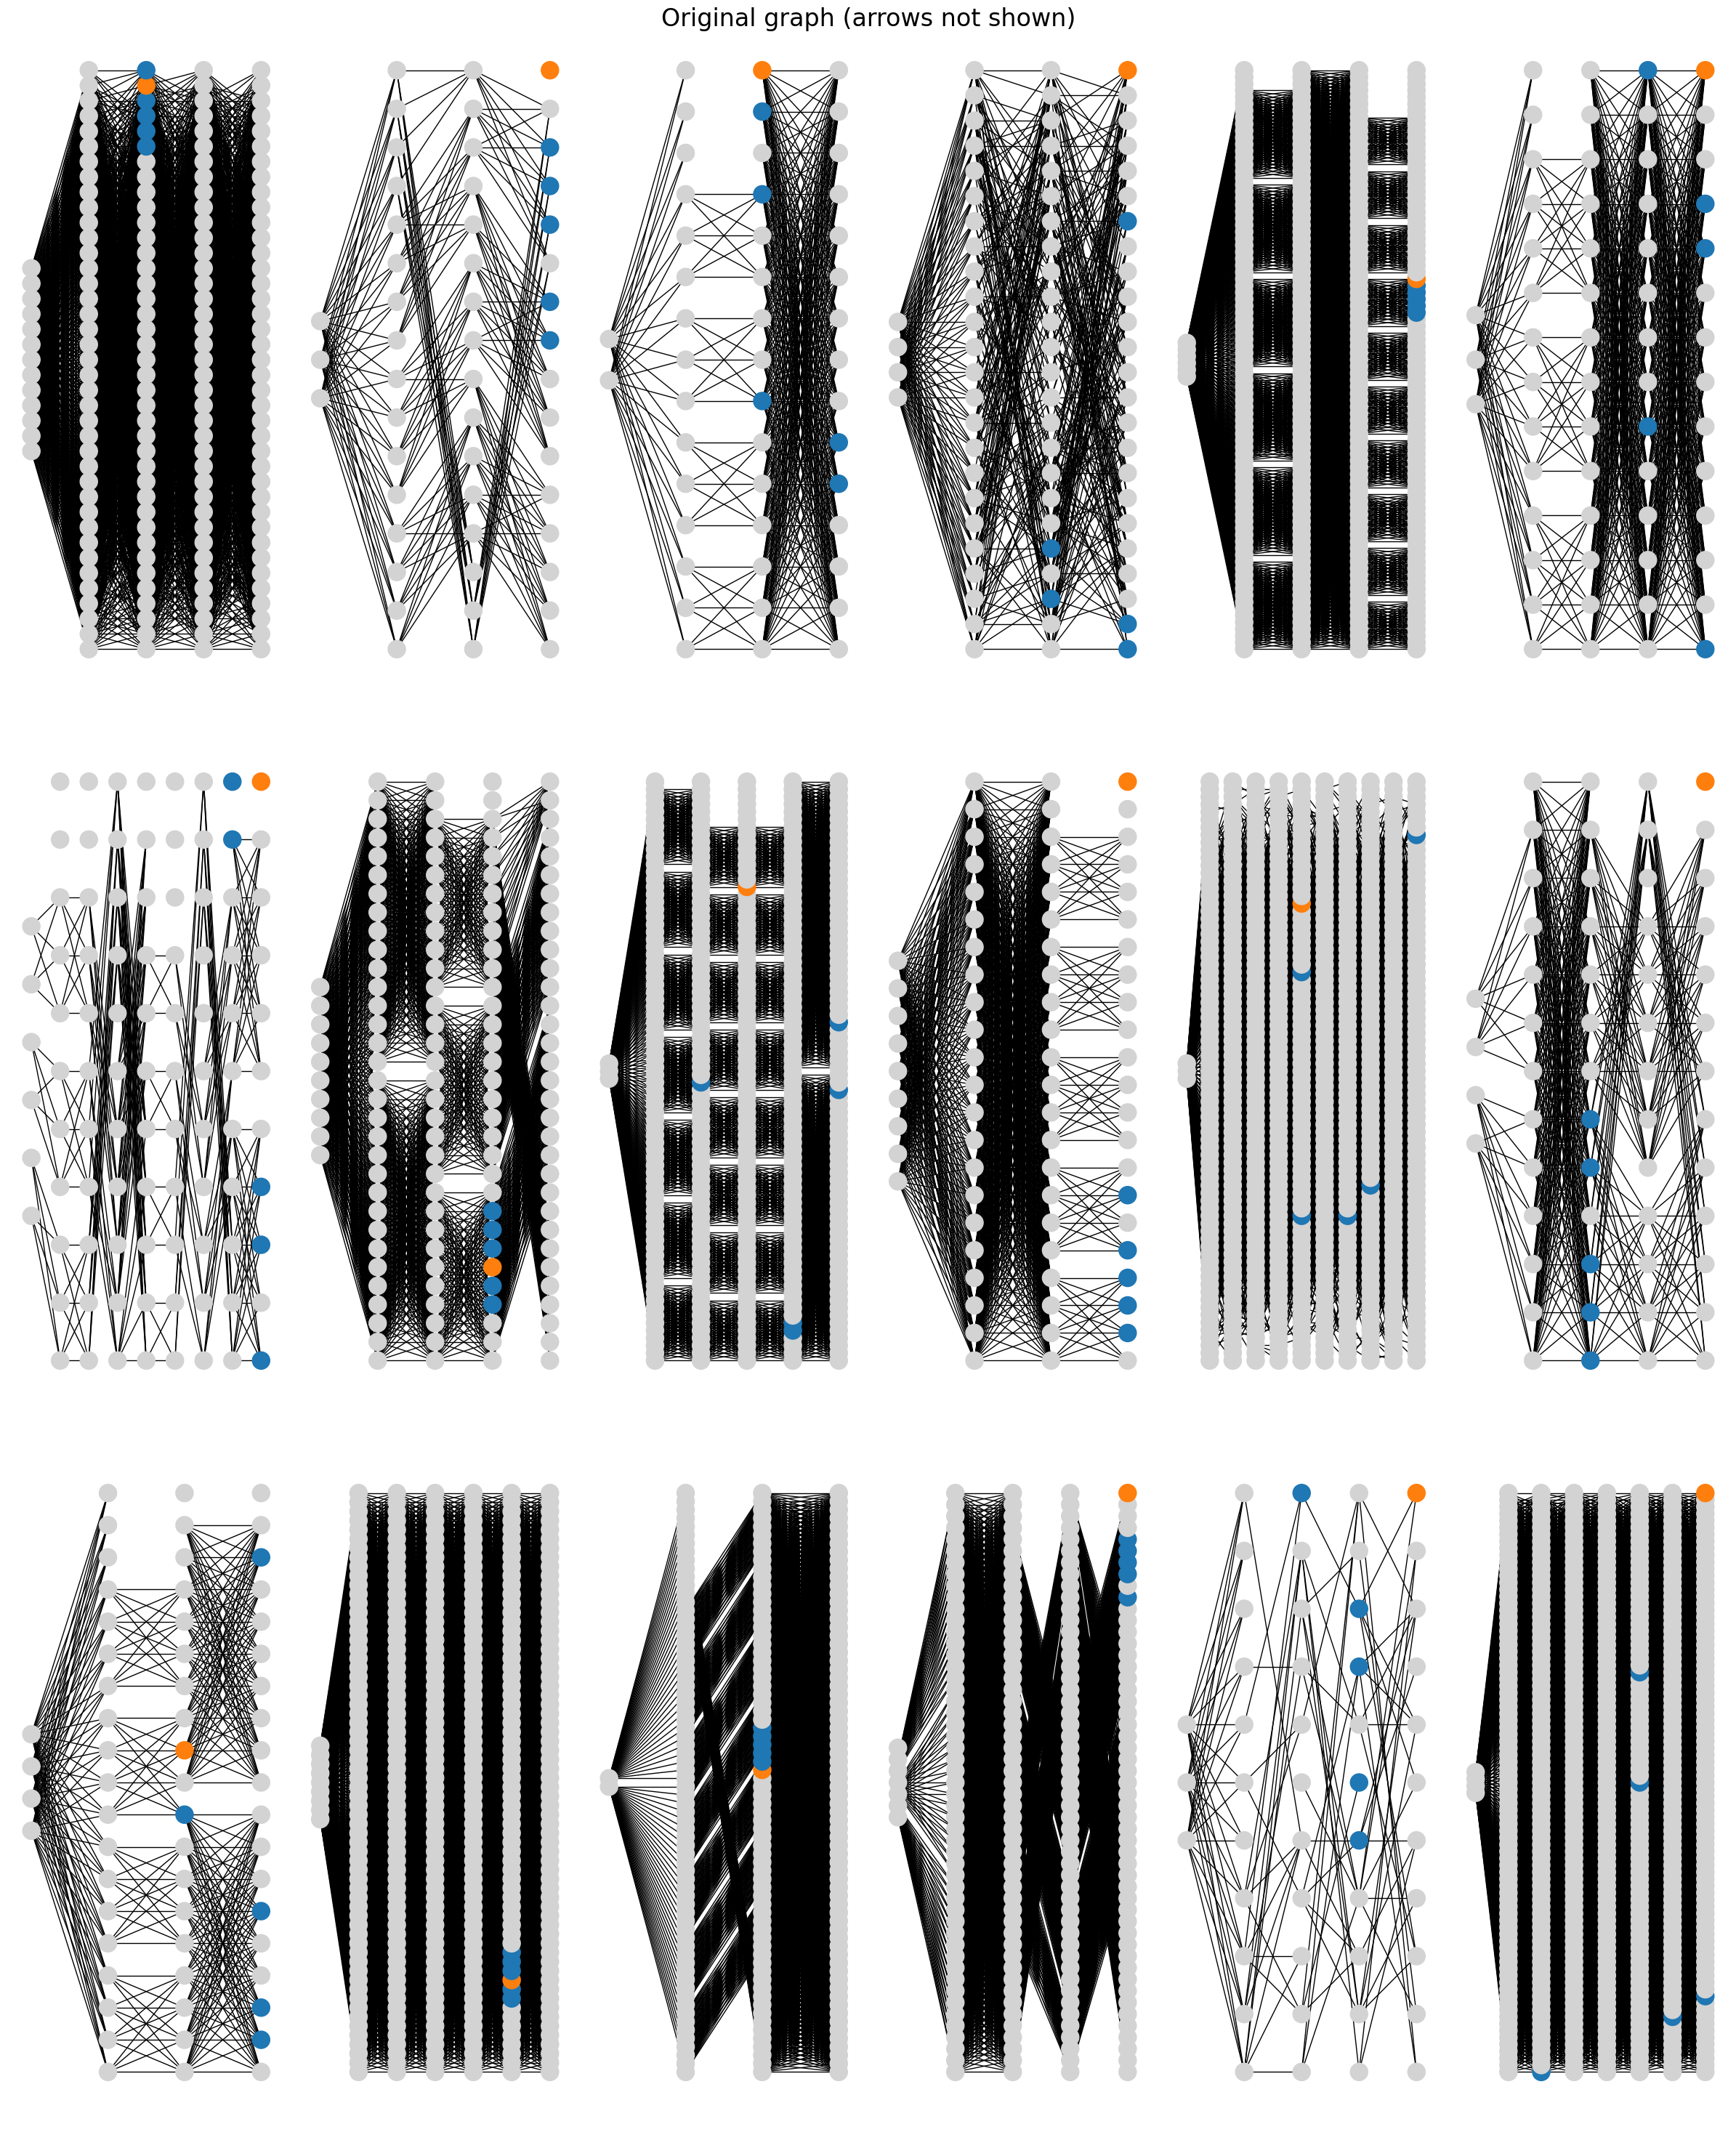

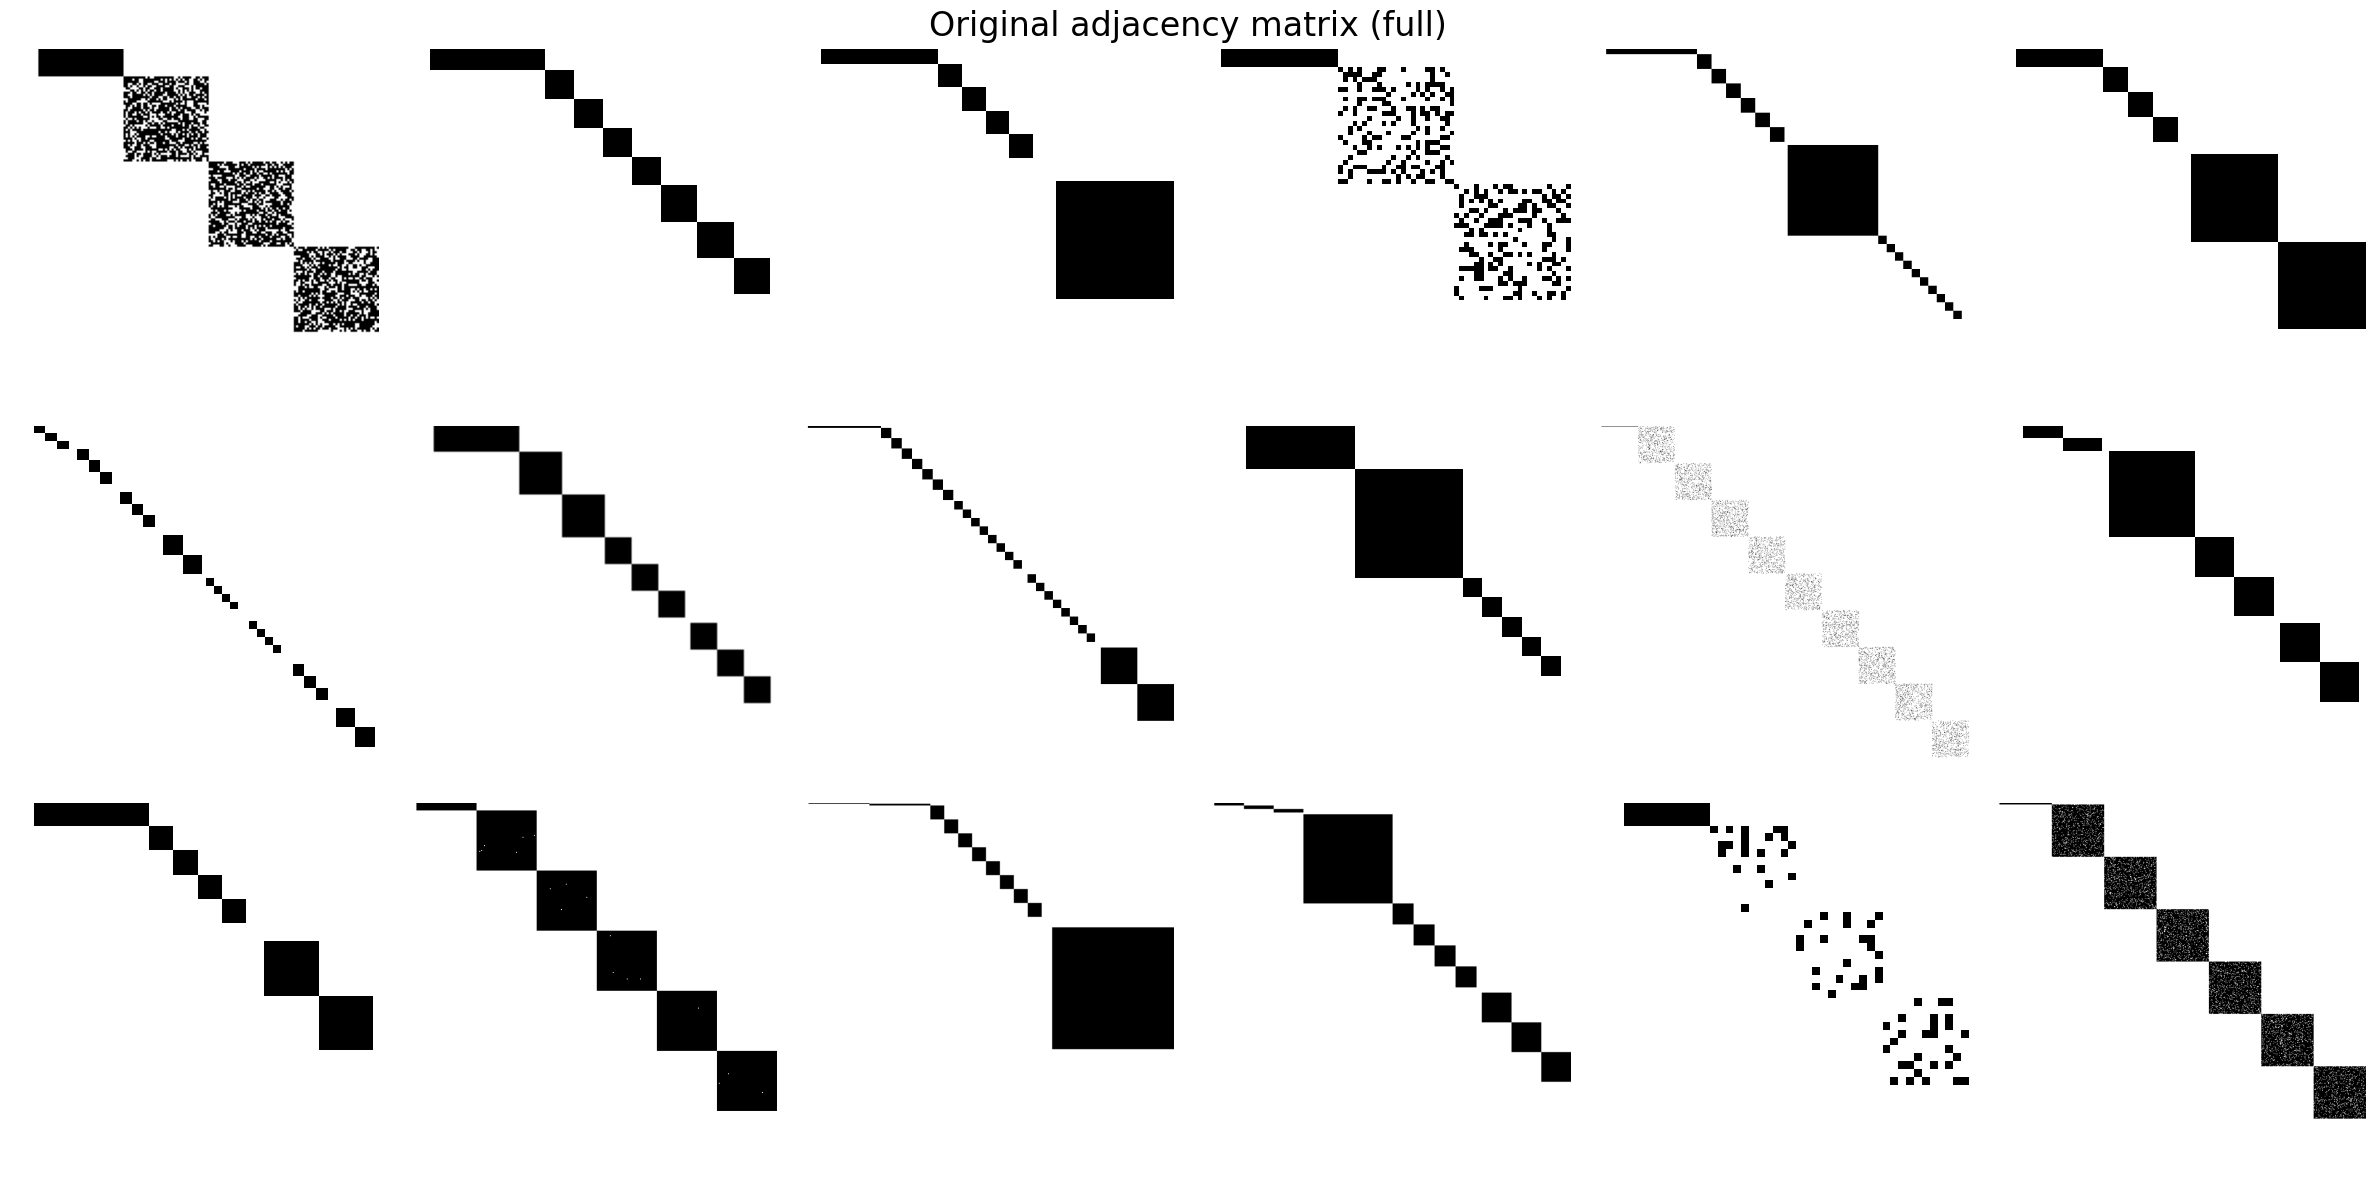

In [5]:
draw_scms(
    graphs, 
    suptitle='Original graph (arrows not shown)',
    n_rows = 3,
)
imshow(
    adjs, 
    cmap = ListedColormap(['white', 'black']), 
    suptitle='Original adjacency matrix (full)',
    n_rows = 3,
)

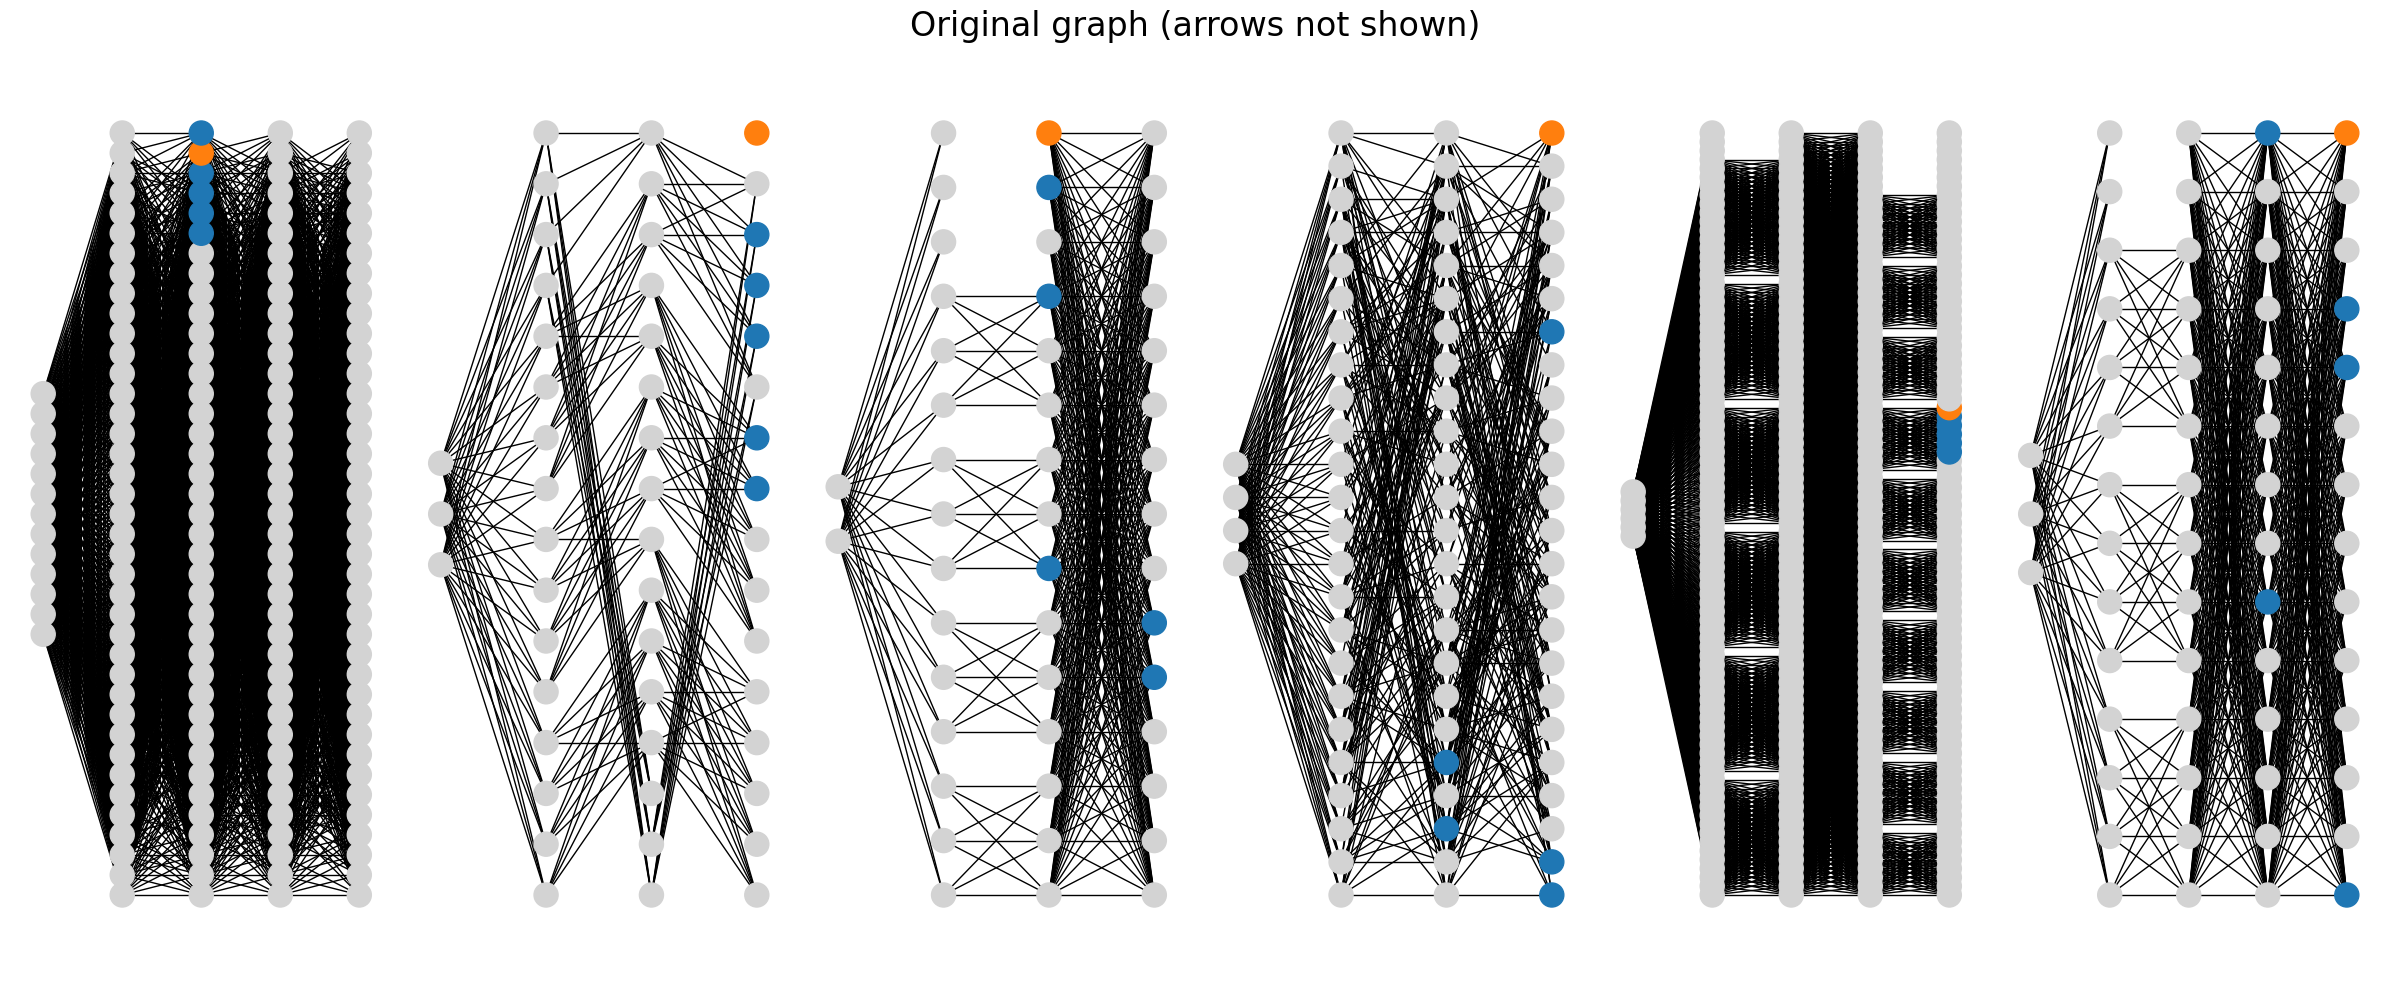

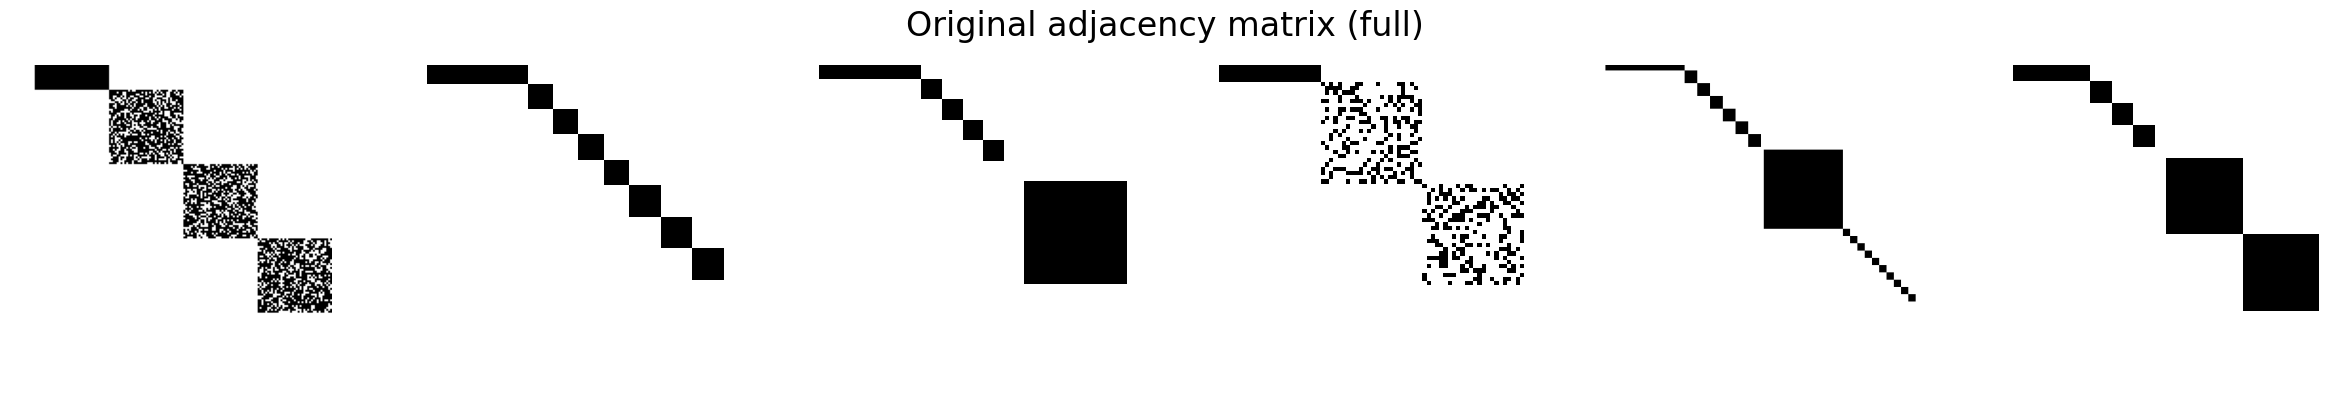

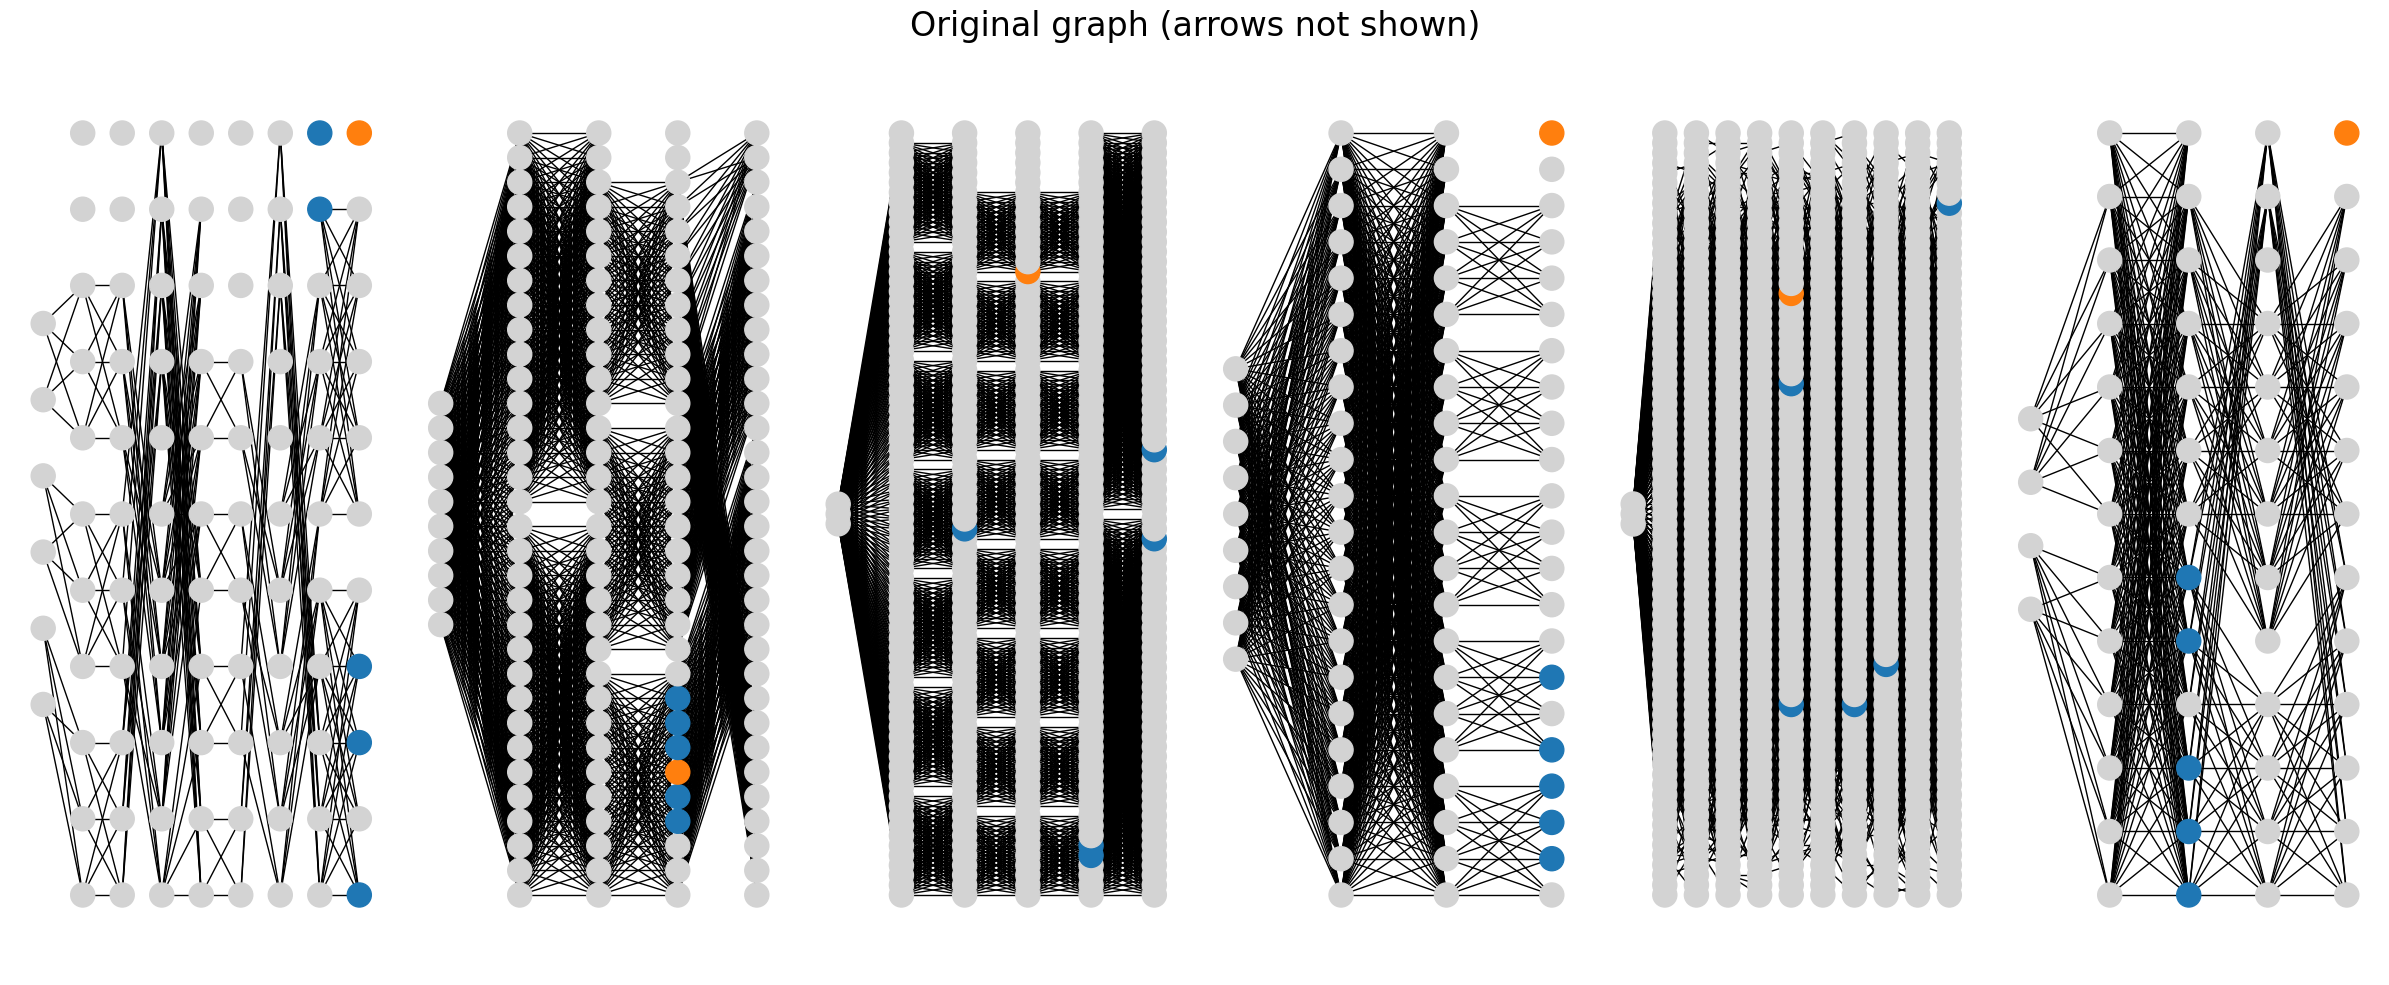

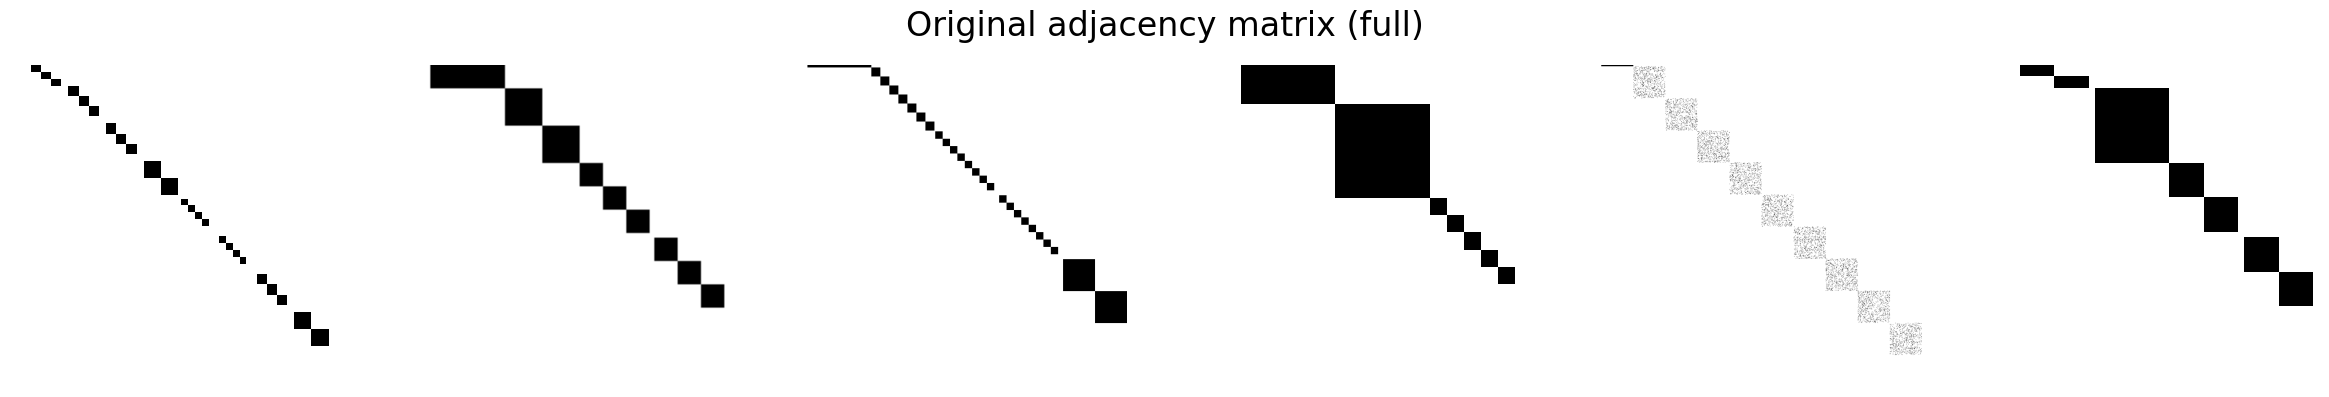

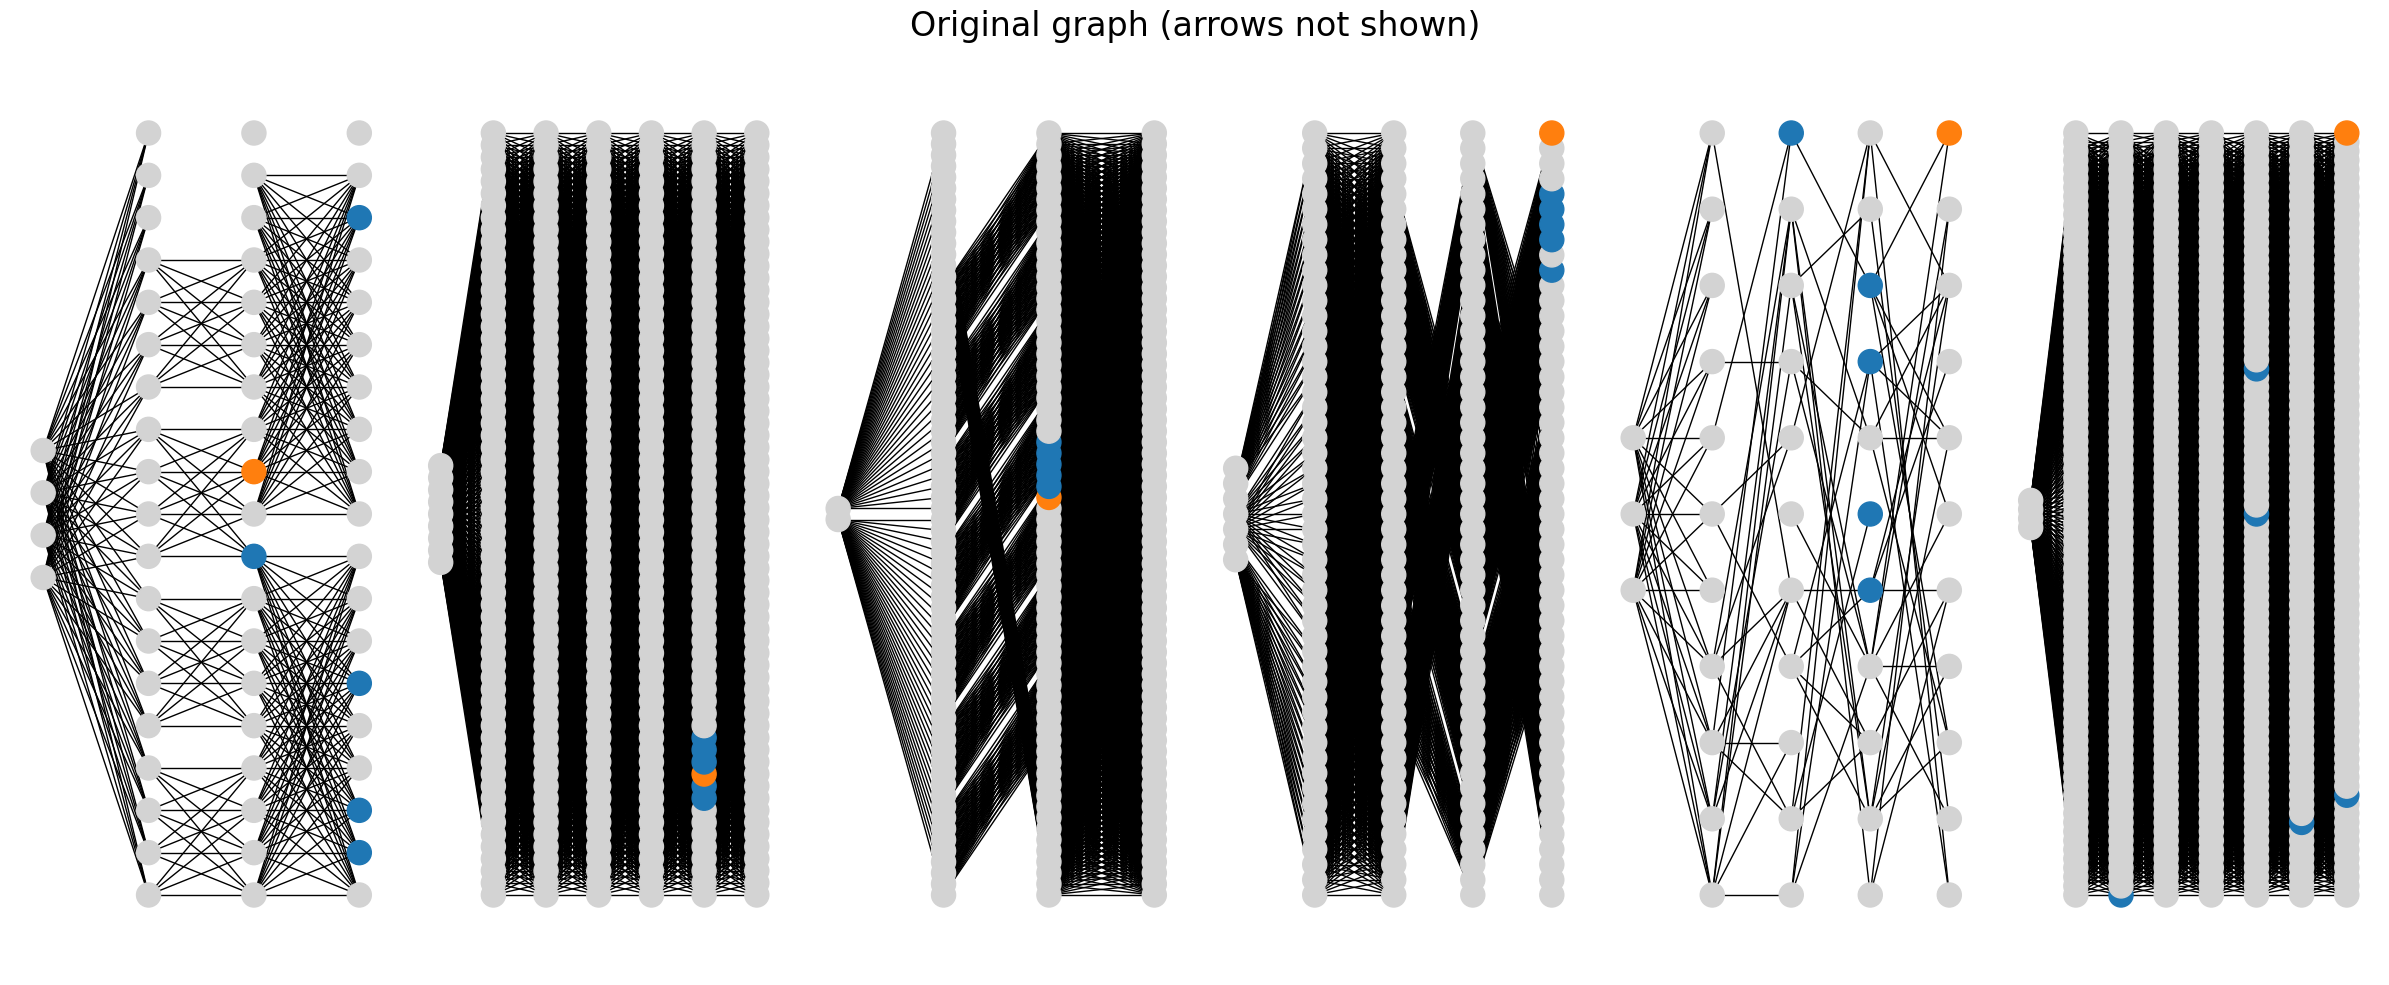

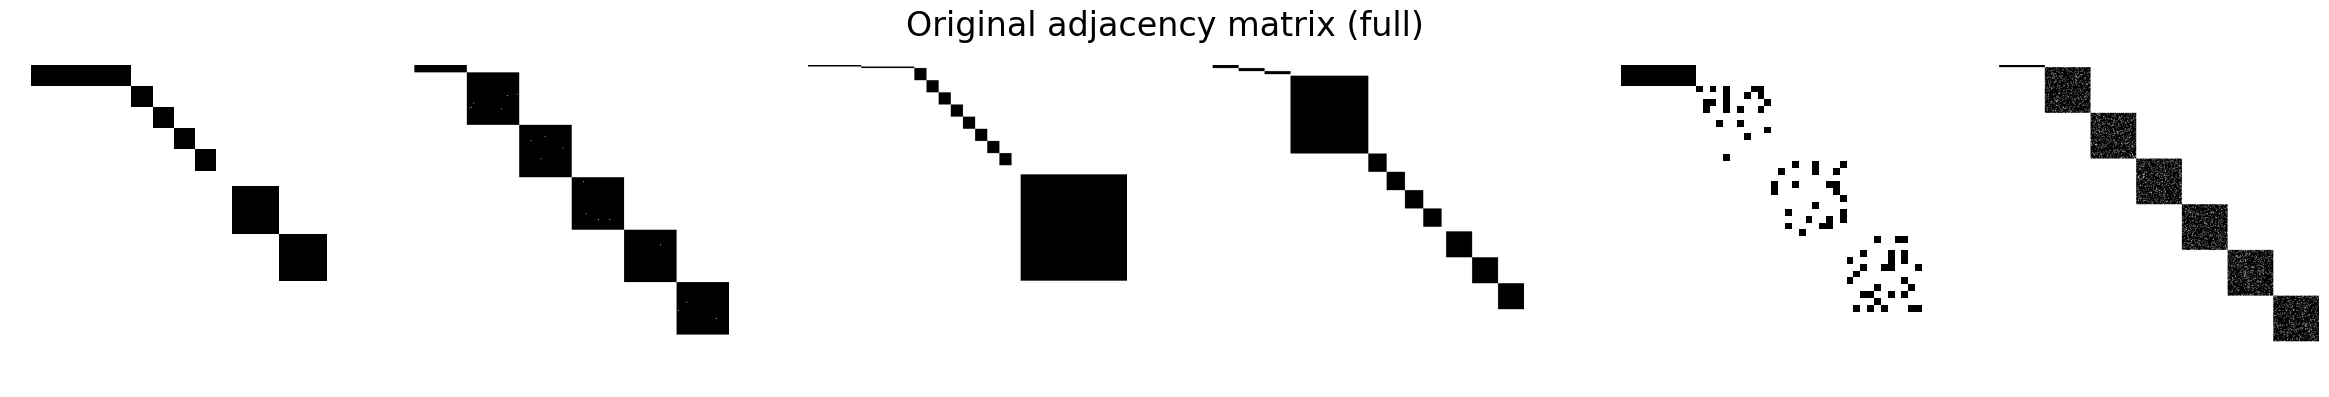

In [6]:
n_cols = 6
for j, i in enumerate(range(0, len(adjs), n_cols)):
    idx_slice = slice(i, i+n_cols)

    draw_scms(graphs[idx_slice], suptitle='Original graph (arrows not shown)',)
    imshow(adjs[idx_slice], cmap = ListedColormap(['white', 'black']), suptitle='Original adjacency matrix (full)')

    print('\n\n\n\n')
